In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.image import imread
import os
import cv2
import glob
from PIL import Image


import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!unzip train.zip

Archive:  train.zip
   creating: images/
  inflating: images/0.jpg            
  inflating: images/1.jpg            
  inflating: images/10.jpg           
  inflating: images/100.jpg          
  inflating: images/1000.jpg         
  inflating: images/1001.jpg         
  inflating: images/1002.jpg         
  inflating: images/1003.jpg         
  inflating: images/1004.jpg         
  inflating: images/1005.jpg         
  inflating: images/1006.jpg         
  inflating: images/1007.jpg         
  inflating: images/1008.jpg         
  inflating: images/1009.jpg         
  inflating: images/101.jpg          
  inflating: images/1010.jpg         
  inflating: images/1011.jpg         
  inflating: images/1012.jpg         
  inflating: images/1013.jpg         
  inflating: images/1014.jpg         
  inflating: images/1015.jpg         
  inflating: images/1016.jpg         
  inflating: images/1017.jpg         
  inflating: images/1018.jpg         
  inflating: images/1019.jpg         
  inflati

In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
src_path = './images/'

In [ ]:
train_images=[]
for file1 in df_train["image_names"].values:
  pathname = (os.path.join(src_path,file1))
  image = cv2.imread(pathname)
  train_images.append(image)

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.head()

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


In [ ]:
test_images=[]
for file1 in df_test["image_names"].values:
  pathname = (os.path.join(src_path,file1))
  image = cv2.imread(pathname)
  test_images.append(image)

In [ ]:
test_img_arr = np.asarray(test_images)

In [ ]:
test_img_arr.shape


(706, 224, 224, 3)

In [ ]:
type(train_images)

list

In [ ]:
train_img_arr = np.asarray(train_images)

In [ ]:
train_img_arr.shape

(1646, 224, 224, 3)

In [ ]:
#torch_train = torch.from_numpy(arr)

In [ ]:
#torch_train

In [ ]:
category = {'Emergency': 1, 'Not_Emergency': 0}

In [ ]:
def plot_class(cat):
    
    fetch = df_train.loc[df_train['emergency_or_not']== category[cat]][:3]
    fig = plt.figure(figsize=(20,15))
    
    for i , index in enumerate(fetch.index ,1):
        plt.subplot(1,3 ,i)
        plt.imshow(train_images[index])
        plt.xlabel(cat + " (Index:" +str(index)+")" )
    plt.show()

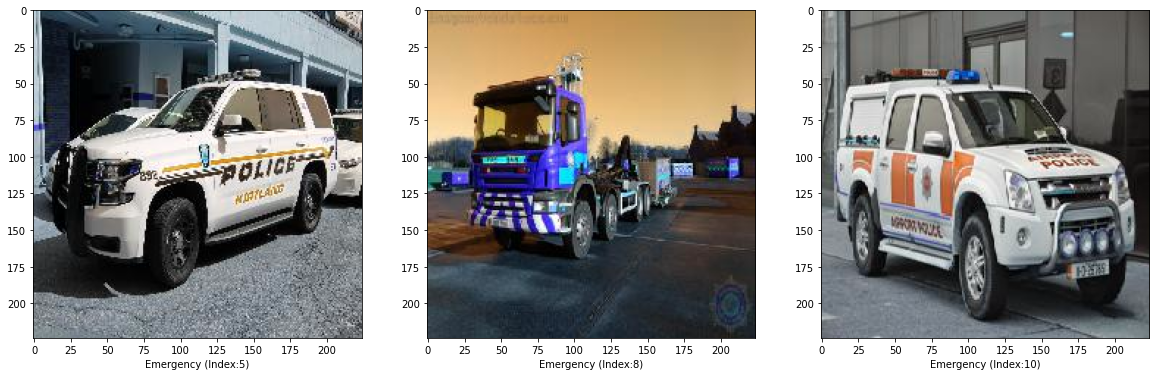

In [ ]:
plot_class('Emergency')

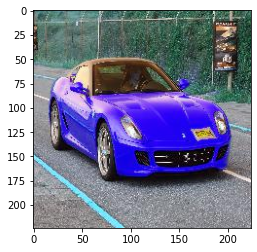

In [ ]:
#plt.subplot(1,3)
plt.imshow(train_images[2])
plt.show()

In [ ]:
#plt.imshow(torch_train[2])
#plt.show()

In [ ]:
df_train['emergency_or_not'].values[5]

1

In [ ]:
#train_imagesdf

In [ ]:
labels=df_train.iloc[:,1].values
#list_label=labels.tolist()

In [ ]:
labels = labels.astype(int)

In [ ]:
#for i in [1,2,3, 4,5,6,7]:
 # plt.subplot(2,5 ,i)
  #plt.imshow(torch_train[i])
  #plt.xlabel(label[i])
#plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (224, 224, 3), 
                                include_top = False)


87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

#model = Model( pre_trained_model.input, x) 

#model.compile(optimizer = RMSprop(lr=0.0001), 
              #loss = 'binary_crossentropy', 
              #metrics = ['accuracy'])


In [ ]:
from tensorflow.keras.optimizers import RMSprop
#####trying with my own CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 109, 109, 128)     147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 52, 52, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 86528)            

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
train_generator = train_datagen.flow(train_img_arr, labels, batch_size=64)

In [ ]:
history=model.fit_generator(train_generator, epochs=100, verbose=1)

Epoch 1/100
26/26 [==============================] - 26s 997ms/step - loss: 0.9087 - accuracy: 0.5753
Epoch 2/100
26/26 [==============================] - 24s 926ms/step - loss: 0.6525 - accuracy: 0.6397
Epoch 3/100
26/26 [==============================] - 24s 922ms/step - loss: 0.5984 - accuracy: 0.6938
Epoch 4/100
26/26 [==============================] - 24s 923ms/step - loss: 0.5977 - accuracy: 0.6774
Epoch 5/100
26/26 [==============================] - 24s 926ms/step - loss: 0.5905 - accuracy: 0.7047
Epoch 6/100
26/26 [==============================] - 24s 928ms/step - loss: 0.5681 - accuracy: 0.7272
Epoch 7/100
26/26 [==============================] - 24s 918ms/step - loss: 0.5685 - accuracy: 0.7236
Epoch 8/100
26/26 [==============================] - 24s 936ms/step - loss: 0.5607 - accuracy: 0.7278
Epoch 9/100
26/26 [==============================] - 24s 921ms/step - loss: 0.5331 - accuracy: 0.7327
Epoch 10/100
26/26 [==============================] - 24s 915ms/step - loss: 0.542

Text(0.5, 1.0, 'Training and validation loss')

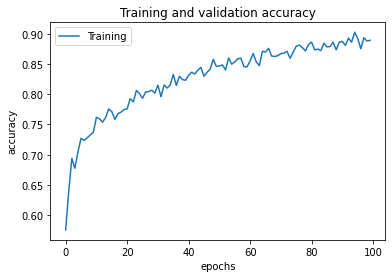

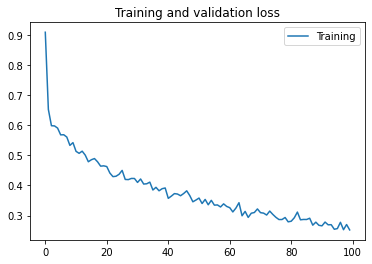

In [ ]:
import matplotlib.pyplot as plt


acc      = history.history[     'accuracy' ]
#val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
#val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


plt.plot  ( epochs,     acc, label='Training')
#plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.figure()


plt.plot  ( epochs,     loss, label='Training')
#plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [ ]:
sol = model.predict_classes(test_img_arr)

In [ ]:
sol.shape

(706, 1)

In [ ]:
sol

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [ ]:
#sol[sol >= 0.1] = 1

In [ ]:
#sol[sol <0.1] = 0

In [ ]:
#sol

In [ ]:
np.unique(sol)

array([0, 1], dtype=int32)

In [ ]:
sol_df = pd.Series(sol.flatten())

In [ ]:
sol_df = sol_df.rename('emergency_or_not')

In [ ]:
sol_df = sol_df.astype(int)

In [ ]:
final_df = pd.concat([df_test, sol_df], axis=1)

In [ ]:
#final_df

In [ ]:
fr = open("sub6.csv", "w")
final_df.to_csv(r'sub6.csv', index = False)
fr.close()